In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models, transforms, datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from early_stopping import EarlyStopping  # You may need to implement or import EarlyStopping
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = {'image': self.data[idx], 'label': self.labels[idx]}

        if self.transform:
            sample['image'] = self.transform(sample['image'])

        return sample

# Directory paths
pre_Dir="./"
train_directory = pre_Dir+'train'
val_directory = pre_Dir+'val'

test_directory = pre_Dir+'test'
batch_size = 32
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Adjust size accordingly
    transforms.Grayscale(num_output_channels=3),  # Convert to grayscale with 3 channels
    transforms.ToTensor(),
])


# Load and preprocess the training data
train_dataset = datasets.ImageFolder(root=train_directory, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Load and preprocess the training data
val_dataset = datasets.ImageFolder(root=val_directory, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

# Load and preprocess the test data
test_dataset = datasets.ImageFolder(root=test_directory, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# # Assuming train_x and train_y are your features and labels, respectively
# train_x, val_x, train_y, val_y = train_test_split(train_dataset.data, train_dataset.targets, test_size=0.2, random_state=42)

# # Assuming CustomDataset is your dataset class
# train_dataset = CustomDataset(data=train_x, labels=train_y, transform=train_transform)
# val_dataset = CustomDataset(data=val_x, labels=val_y, transform=train_transform)

# # Assuming batch_size is defined
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
# Print the shapes of the datasets
# Print the sizes of the datasets
print("Training set size:", len(train_dataset))
print("Validation set size:", len(val_dataset))
print("Test set size:", len(test_dataset))


Training set size: 10500
Validation set size: 2250
Test set size: 2250


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models, transforms, datasets
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from early_stopping import EarlyStopping
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = {'image': self.data[idx], 'label': self.labels[idx]}

        if self.transform:
            sample['image'] = self.transform(sample['image'])

        return sample

# Directory paths
train_directory = './train'
val_directory = './val'
test_directory = './test'
batch_size = 64  # Increased batch size

# Assuming train_dataset is your original dataset
original_size = len(train_dataset)
desired_percentage = 0.1  # Change this to the desired percentage

# Calculate the new size based on the desired percentage
new_size = int(original_size * desired_percentage)

# Use random_split to create a new dataset with the decreased size

# Adjust the train/validation/test split or reduce the size of your original datasets
train_dataset = datasets.ImageFolder(root=train_directory, transform=transform)
# train_dataset, _ = torch.utils.data.random_split(train_dataset, [len(train_dataset) // 2, len(train_dataset) // 2])  # Decreased training set size
train_dataset, _ = torch.utils.data.random_split(train_dataset, [new_size, original_size - new_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
original_size = len(val_dataset)

# Calculate the new size based on the desired percentage
new_size = int(original_size * desired_percentage)
val_dataset = datasets.ImageFolder(root=val_directory, transform=transform)
# val_dataset, _ = torch.utils.data.random_split(val_dataset, [len(val_dataset) // 2, len(val_dataset) // 2])  # Decreased validation set size
val_dataset, _ = torch.utils.data.random_split(val_dataset, [new_size, original_size - new_size])
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
original_size = len(test_dataset)

# Calculate the new size based on the desired percentage
new_size = int(original_size * desired_percentage)
test_dataset = datasets.ImageFolder(root=test_directory, transform=transform)
# test_dataset, _ = torch.utils.data.random_split(test_dataset, [len(test_dataset) // 2, len(test_dataset) // 2])  # Decreased test set size
test_dataset, _ = torch.utils.data.random_split(test_dataset, [new_size, original_size - new_size])

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print the sizes of the datasets
print("Training set size:", len(train_dataset))
print("Validation set size:", len(val_dataset))
print("Test set size:", len(test_dataset))


Training set size: 1050
Validation set size: 225
Test set size: 225


In [3]:
# Load pre-trained VGG-19 model
vgg19 = models.vgg19(pretrained=True)
num_classes = 15
# Option 1: Fine-tune all layers
for param in vgg19.parameters():
    param.requires_grad = True

# Option 2: Fine-tune only FC1 and FC2 layers
# vgg19.classifier[-1] and vgg19.classifier[-3] are FC2 and FC1 layers respectively
for param in vgg19.classifier[-1].parameters():
    param.requires_grad = True
for param in vgg19.classifier[-3].parameters():
    param.requires_grad = True

# Modify the last layer for your classification task
# Assuming you have num_classes for your specific case
vgg19.classifier[-1] = nn.Linear(in_features=4096, out_features=num_classes)


c:\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


KeyboardInterrupt: 

In [ ]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg19.parameters(), lr=learning_rate)
early_stopping = EarlyStopping(depth=5, ignore=10, method='consistency')


In [ ]:
import torch

num_epochs = 5
desired_batches_per_epoch = 10  # Change this to the desired number of batches per epoch

# Track validation loss across epochs
best_val_loss = float('inf')
patience = 2
current_patience = 0
train_losses = []
val_losses = []

# Training loop
for epoch in range(num_epochs):
    print(f"Epoch [{epoch + 1}/{num_epochs}]")
    vgg19.train()
    
    # Use itertools to create an iterator that resets after each epoch
    train_loader_iter = iter(train_loader)
    
    epoch_train_losses = []  # Reset training losses for each epoch

    for batch_idx in range(desired_batches_per_epoch):
        try:
            inputs, labels = next(train_loader_iter)
        except StopIteration:
            # If the iterator reaches the end of the data, reset it
            train_loader_iter = iter(train_loader)
            inputs, labels = next(train_loader_iter)

        optimizer.zero_grad()
        outputs = vgg19(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Append training loss for each batch
        epoch_train_losses.append(loss.item())

        # Print training loss for each batch
        print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{desired_batches_per_epoch}], Train Loss: {loss.item():.4f}")

    # Append the average training loss for the epoch
    train_losses.append(sum(epoch_train_losses) / len(epoch_train_losses))

    # Validation loss
    vgg19.eval()

    with torch.no_grad():
        for inputs_val, labels_val in val_loader:
            outputs_val = vgg19(inputs_val)
            val_loss = criterion(outputs_val, labels_val)
            val_losses.append(val_loss.item())

        avg_val_loss = sum(val_losses) / len(val_losses)
        
        # Print validation loss for each epoch
        print(f"Epoch [{epoch + 1}/{num_epochs}], Val Loss: {avg_val_loss:.4f}")

        # Check if the validation loss has improved
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            current_patience = 0  # Reset patience if there's an improvement
            print("Validation loss improved!")
        else:
            current_patience += 1
            print("Validation loss did not improve.")

        # Check early stopping condition
        if current_patience >= patience:
            print("Early stopping")
            break  # End training loop if early stopping condition is met

# ... (Continue with the rest of your code)


Epoch [1/3]
Epoch [1/3], Batch [1/1], Train Loss: 2.7389
Epoch [1/3], Val Loss: 2.7164
Validation loss improved!
Epoch [2/3]
Epoch [2/3], Batch [1/1], Train Loss: 2.6892
Epoch [2/3], Val Loss: 2.7236
Validation loss did not improve.
Epoch [3/3]
Epoch [3/3], Batch [1/1], Train Loss: 2.7279
Epoch [3/3], Val Loss: 2.7230
Validation loss did not improve.


In [ ]:
"""import torch

num_epochs = 5
desired_batches_per_epoch = 1  # Change this to the desired number of batches per epoch

# Track validation loss across epochs
best_val_loss = float('inf')
patience = 3
current_patience = 0

# Training loop
for epoch in range(num_epochs):
    vgg19.train()
    
    # ... (training loop remains the same)
    # Use itertools to create an iterator that resets after each epoch
    train_loader_iter = iter(train_loader)
    
    for batch_idx in range(desired_batches_per_epoch):
        try:
            inputs, labels = next(train_loader_iter)
        except StopIteration:
            # If the iterator reaches the end of the data, reset it
            train_loader_iter = iter(train_loader)
            inputs, labels = next(train_loader_iter)

        optimizer.zero_grad()
        outputs = vgg19(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print training loss for each batch
        print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{desired_batches_per_epoch}], Train Loss: {loss.item():.4f}")

    # Validation loss
    # Validation loss
    vgg19.eval()
    val_losses = []

    with torch.no_grad():
        for inputs_val, labels_val in val_loader:
            outputs_val = vgg19(inputs_val)
            val_loss = criterion(outputs_val, labels_val)
            val_losses.append(val_loss.item())

        avg_val_loss = sum(val_losses) / len(val_losses)

        # Check if the validation loss has improved
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            current_patience = 0  # Reset patience if there's an improvement
        else:
            current_patience += 1

        # Print validation loss for each epoch
        print(f"Epoch [{epoch + 1}/{num_epochs}], Val Loss: {avg_val_loss:.4f}")

        # Check early stopping condition
        if current_patience >= patience:
            print("Early stopping")
            break  # End training loop if early stopping condition is met
"""

'import torch\n\nnum_epochs = 5\ndesired_batches_per_epoch = 1  # Change this to the desired number of batches per epoch\n\n# Track validation loss across epochs\nbest_val_loss = float(\'inf\')\npatience = 3\ncurrent_patience = 0\n\n# Training loop\nfor epoch in range(num_epochs):\n    vgg19.train()\n    \n    # ... (training loop remains the same)\n    # Use itertools to create an iterator that resets after each epoch\n    train_loader_iter = iter(train_loader)\n    \n    for batch_idx in range(desired_batches_per_epoch):\n        try:\n            inputs, labels = next(train_loader_iter)\n        except StopIteration:\n            # If the iterator reaches the end of the data, reset it\n            train_loader_iter = iter(train_loader)\n            inputs, labels = next(train_loader_iter)\n\n        optimizer.zero_grad()\n        outputs = vgg19(inputs)\n        loss = criterion(outputs, labels)\n        loss.backward()\n        optimizer.step()\n\n        # Print training loss for 

In [ ]:
"""import torch

num_epochs = 5
desired_batches_per_epoch = 5  # Change this to the desired number of batches per epoch

# Instantiate EarlyStopping object before the training loop
early_stopping = EarlyStopping(patience=3, verbose=True)  # Adjust patience and other parameters as needed

# Training loop
for epoch in range(num_epochs):
    vgg19.train()
    
    # Use itertools to create an iterator that resets after each epoch
    train_loader_iter = iter(train_loader)
    
    for batch_idx in range(desired_batches_per_epoch):
        try:
            inputs, labels = next(train_loader_iter)
        except StopIteration:
            # If the iterator reaches the end of the data, reset it
            train_loader_iter = iter(train_loader)
            inputs, labels = next(train_loader_iter)

        optimizer.zero_grad()
        outputs = vgg19(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print training loss for each batch
        print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{desired_batches_per_epoch}], Train Loss: {loss.item():.4f}")

    # Validation loss
    vgg19.eval()
    with torch.no_grad():
        for inputs_val, labels_val in val_loader:
            outputs_val = vgg19(inputs_val)
            val_loss = criterion(outputs_val, labels_val)

    # Update EarlyStopping object with the validation loss
    early_stopping.step(val_loss.item())

    # Print validation loss for each epoch
    print(f"Epoch [{epoch + 1}/{num_epochs}], Val Loss: {val_loss.item():.4f}")

    # Check if early stopping condition is met
    if early_stopping.should_stop():    
        print("Early stopping")
        break"""

'import torch\n\nnum_epochs = 5\ndesired_batches_per_epoch = 5  # Change this to the desired number of batches per epoch\n\n# Instantiate EarlyStopping object before the training loop\nearly_stopping = EarlyStopping(patience=3, verbose=True)  # Adjust patience and other parameters as needed\n\n# Training loop\nfor epoch in range(num_epochs):\n    vgg19.train()\n    \n    # Use itertools to create an iterator that resets after each epoch\n    train_loader_iter = iter(train_loader)\n    \n    for batch_idx in range(desired_batches_per_epoch):\n        try:\n            inputs, labels = next(train_loader_iter)\n        except StopIteration:\n            # If the iterator reaches the end of the data, reset it\n            train_loader_iter = iter(train_loader)\n            inputs, labels = next(train_loader_iter)\n\n        optimizer.zero_grad()\n        outputs = vgg19(inputs)\n        loss = criterion(outputs, labels)\n        loss.backward()\n        optimizer.step()\n\n        # Print 

In [ ]:
# num_epochs = 20
# for epoch in range(num_epochs):
#     vgg19.train()
#     for inputs, labels in train_loader:
#         optimizer.zero_grad()
#         outputs = vgg19(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#     # Validation loss
#     vgg19.eval()
#     with torch.no_grad():
#         for inputs_val, labels_val in val_loader:
#             outputs_val = vgg19(inputs_val)
#             val_loss = criterion(outputs_val, labels_val)

#     early_stopping(val_loss, vgg19)
#     if early_stopping.early_stop:
#         print("Early stopping")
#         break


In [ ]:
from sklearn.metrics import classification_report

vgg19.eval()
all_labels, all_preds = [], []

with torch.no_grad():
    for inputs_test, labels_test in test_loader:
        outputs_test = vgg19(inputs_test)
        _, preds = torch.max(outputs_test, 1)
        all_labels.extend(labels_test.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Calculate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(all_labels, all_preds, zero_division=1))


Confusion Matrix:
 [[ 0  0  0  0 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0  0  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        16
           1       1.00      0.00      0.00        19
           2       1.00      0.00      0.00        12
           3       

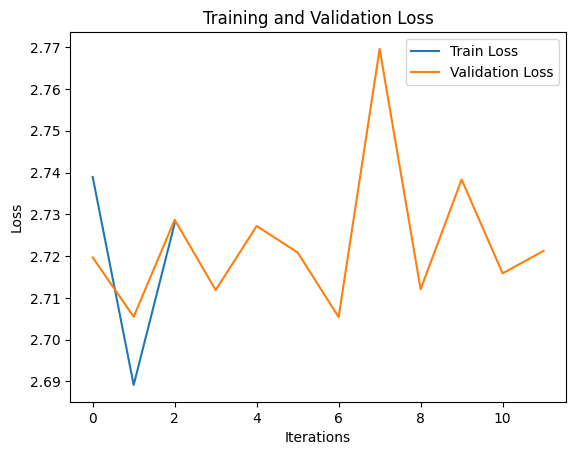

In [ ]:
# Plotting error curves (train vs validation) over epochs
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()


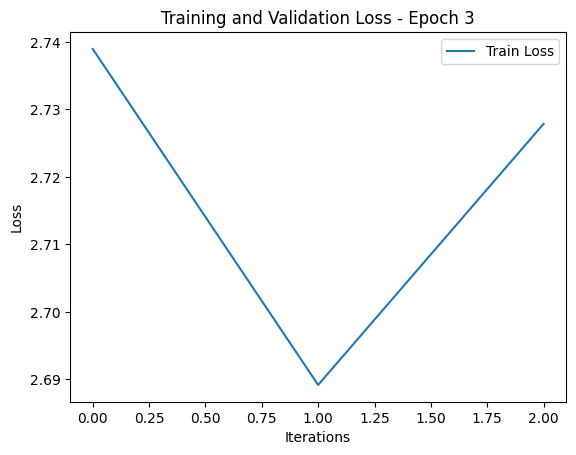

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title(f'Training and Validation Loss - Epoch {epoch + 1}')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load pre-trained VGG-19 model
vgg19_fc_layers = models.vgg19(pretrained=True)
patience = 2
current_patience=0
# Freeze all layers
for param in vgg19_fc_layers.parameters():
    param.requires_grad = False

# Modify the last two fully connected layers for your classification task
num_classes = 15
vgg19_fc_layers.classifier[-1] = nn.Linear(in_features=4096, out_features=num_classes)
vgg19_fc_layers.classifier[-3] = nn.Linear(in_features=4096, out_features=4096)

# Allow gradients for the last two fully connected layers
for param in vgg19_fc_layers.classifier[-1].parameters():
    param.requires_grad = True
for param in vgg19_fc_layers.classifier[-3].parameters():
    param.requires_grad = True

# Define optimizer and criterion
learning_rate_fc_layers = 0.001
optimizer_fc_layers = optim.Adam(vgg19_fc_layers.parameters(), lr=learning_rate_fc_layers)
criterion_fc_layers = nn.CrossEntropyLoss()

# ... (Rest of the training loop remains the same)

# Training loop for the second model (only FC1 and FC2 layers)
for epoch in range(num_epochs):
    print(f"Epoch [{epoch + 1}/{num_epochs}]")
    vgg19_fc_layers.train()
    
    # Use itertools to create an iterator that resets after each epoch
    train_loader_iter_fc_layers = iter(train_loader)
    
    for batch_idx in range(desired_batches_per_epoch):
        try:
            inputs_fc_layers, labels_fc_layers = next(train_loader_iter_fc_layers)
        except StopIteration:
            # If the iterator reaches the end of the data, reset it
            train_loader_iter_fc_layers = iter(train_loader)
            inputs_fc_layers, labels_fc_layers = next(train_loader_iter_fc_layers)

        optimizer_fc_layers.zero_grad()
        outputs_fc_layers = vgg19_fc_layers(inputs_fc_layers)
        loss_fc_layers = criterion_fc_layers(outputs_fc_layers, labels_fc_layers)
        loss_fc_layers.backward()
        optimizer_fc_layers.step()

        # Print training loss for each batch
        print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{desired_batches_per_epoch}], Train Loss: {loss_fc_layers.item():.4f}")

    # Validation loss for the second model
    vgg19_fc_layers.eval()

    with torch.no_grad():
        val_losses_fc_layers = []

        for inputs_val_fc_layers, labels_val_fc_layers in val_loader:
            outputs_val_fc_layers = vgg19_fc_layers(inputs_val_fc_layers)
            val_loss_fc_layers = criterion_fc_layers(outputs_val_fc_layers, labels_val_fc_layers)
            val_losses_fc_layers.append(val_loss_fc_layers.item())

        avg_val_loss_fc_layers = sum(val_losses_fc_layers) / len(val_losses_fc_layers)
        
        # Print validation loss for each epoch
        print(f"Epoch [{epoch + 1}/{num_epochs}], Val Loss (FC Layers): {avg_val_loss_fc_layers:.4f}")

        # Check if the validation loss has improved
        if avg_val_loss_fc_layers < best_val_loss:
            best_val_loss = avg_val_loss_fc_layers
            current_patience = 0  # Reset patience if there's an improvement
            print("Validation loss (FC Layers) improved!")
        else:
            current_patience += 1
            print("Validation loss (FC Layers) did not improve.")

        # Check early stopping condition
        if current_patience >= patience:
            print("Early stopping")
            break  # End training loop if early stopping condition is met

# ... (Rest of the code for testing, confusion matrix, classification report, and plotting)


c:\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/3]
Epoch [1/3], Batch [1/1], Train Loss: 2.8799
Epoch [1/3], Val Loss (FC Layers): 22.8642
Validation loss (FC Layers) did not improve.
Early stopping


Confusion Matrix (FC Layers):
 [[ 0  0  0  0 13  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  1  5  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  1  3  0  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  3  6  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  1 16  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  3  9  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  2  5  0  0  0  0  0]]
Classification Report (FC Layers):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        16
           1       1.00      0.00      0.00        19
           2       1.00      0.00      0.00      

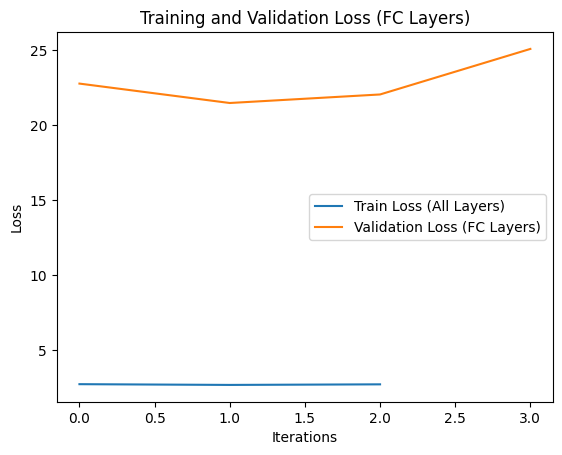

In [ ]:
# ... (Rest of the code)

# Evaluate the second model (only FC1 and FC2 layers) on the test set
vgg19_fc_layers.eval()
all_labels_fc_layers, all_preds_fc_layers = [], []

with torch.no_grad():
    for inputs_test_fc_layers, labels_test_fc_layers in test_loader:
        outputs_test_fc_layers = vgg19_fc_layers(inputs_test_fc_layers)
        _, preds_fc_layers = torch.max(outputs_test_fc_layers, 1)
        all_labels_fc_layers.extend(labels_test_fc_layers.cpu().numpy())
        all_preds_fc_layers.extend(preds_fc_layers.cpu().numpy())

# Calculate confusion matrix for the second model
conf_matrix_fc_layers = confusion_matrix(all_labels_fc_layers, all_preds_fc_layers)
print("Confusion Matrix (FC Layers):\n", conf_matrix_fc_layers)

# Generate and print classification report for the second model
classification_report_fc_layers = classification_report(all_labels_fc_layers, all_preds_fc_layers, zero_division=1)
print("Classification Report (FC Layers):\n", classification_report_fc_layers)

# Plotting error curves (train vs validation) over epochs for the second model
plt.plot(train_losses, label='Train Loss (All Layers)')
plt.plot(val_losses_fc_layers, label='Validation Loss (FC Layers)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (FC Layers)')
plt.show()


In [ ]:
# import os
# import cv2
# import numpy as np
# from keras.utils import to_categorical

# def load_images_from_directory(directory):
#     images = []
#     labels = []
#     class_folders = sorted(os.listdir(directory))
#     for class_label, class_folder in enumerate(class_folders):
#         class_path = os.path.join(directory, class_folder)
#         for filename in os.listdir(class_path):
#             if filename.endswith(('.jpg', '.jpeg', '.png')):
#                 image_path = os.path.join(class_path, filename)
#                 image = cv2.imread(image_path)
#                 image = cv2.resize(image, (28, 28))
#                 image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

#                 images.append(image)
#                 labels.append(class_label)

#     return np.array(images), np.array(labels)

# def preprocess_dataset(images, labels):
#     #images_flat = images.reshape(images.shape[0], -1).T / 255.0
#     labels_one_hot = to_categorical(labels)
#     return  labels_one_hot


# train_directory = './train'
# test_directory = './test'
# train_x_orig, train_y = load_images_from_directory(train_directory)
# train_y = preprocess_dataset(train_x_orig, train_y)
# print(train_x_orig.shape)
# test_x_orig, test_y = load_images_from_directory(test_directory)
# test_y = preprocess_dataset(test_x_orig, test_y)
# print(train_y.shape)

# print(train_y[0])


